LINKEDIN DATA ANALYSIS

C:\Users\Dhanasekar Murugesan\AppData\Local\Temp\ipykernel_36668\2673542812.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  posts["Date/Time"] = pd.to_datetime(posts["Date/Time"], errors="coerce")


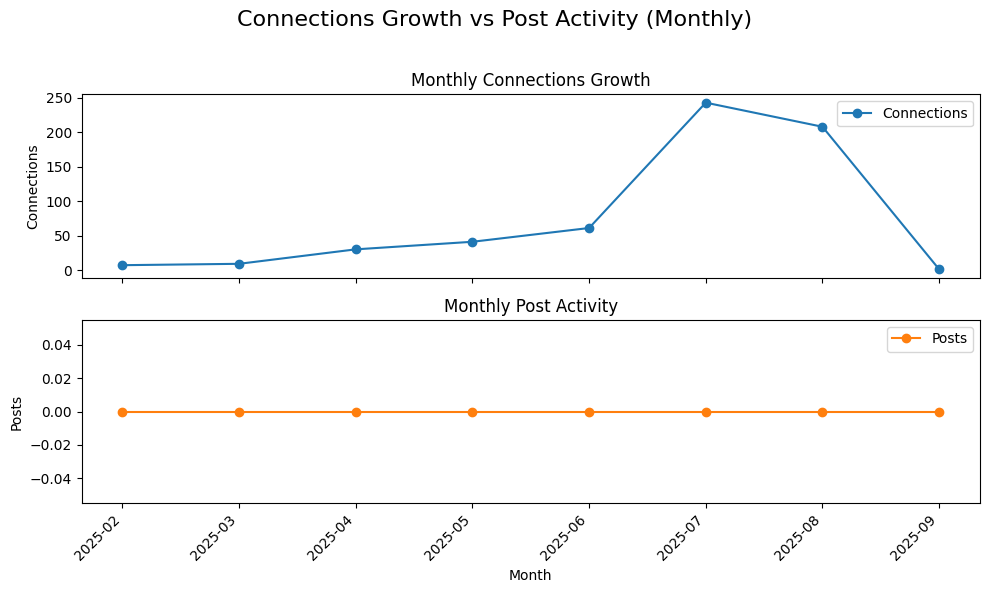

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load Connections data
connections_path = Path("Connections.csv")
if not connections_path.exists():
    raise FileNotFoundError("'Connections.csv' is required for this analysis.")
connections = pd.read_csv(connections_path)

# Load Posts data (optional)
posts_path = Path("Rich_Media.csv")
if posts_path.exists():
    posts = pd.read_csv(posts_path)
else:
    print("Warning: 'Rich_Media.csv' not found. Proceeding with only connections data.")
    posts = pd.DataFrame(columns=["Date/Time"])

# Convert date columns to datetime
connections["Connected On"] = pd.to_datetime(connections["Connected On"], errors="coerce")
if not posts.empty and "Date/Time" in posts.columns:
    posts["Date/Time"] = pd.to_datetime(posts["Date/Time"], errors="coerce")

# Group by month
connections_per_month = connections.groupby(connections["Connected On"].dt.to_period("M")).size()
if not posts.empty and "Date/Time" in posts.columns:
    posts_per_month = posts.groupby(posts["Date/Time"].dt.to_period("M")).size()
else:
    posts_per_month = pd.Series(dtype=int)

# Combine into one DataFrame and sort by month
df = pd.DataFrame({
    "Connections": connections_per_month,
    "Posts": posts_per_month
}).fillna(0)
df.index = df.index.astype(str)  # Convert PeriodIndex to string for better plotting
df = df.sort_index()

# Plot: Connections and Posts as separate subplots (line plots for clarity)
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
df["Connections"].plot(ax=axes[0], marker='o', color='tab:blue', legend=True)
axes[0].set_title("Monthly Connections Growth")
axes[0].set_ylabel("Connections")

df["Posts"].plot(ax=axes[1], marker='o', color='tab:orange', legend=True)
axes[1].set_title("Monthly Post Activity")
axes[1].set_ylabel("Posts")

plt.xlabel("Month")
plt.suptitle("Connections Growth vs Post Activity (Monthly)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()